In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

%matplotlib inline

In [2]:


df = pd.DataFrame({
            'A':np.abs(np.random.randn(100)),
            'B':np.abs(np.random.randn(100))
        }
        ,index=pd.date_range('2018/04/04',periods=100,freq='D')
                    )

In [3]:
df.head()

,A,B
2018-04-04,1.604723,0.486793
2018-04-05,1.429082,0.454768
2018-04-06,0.701380,0.094609
2018-04-07,0.777549,0.318490
2018-04-08,2.536072,0.019948


In [4]:

grouped = df.groupby(pd.Grouper(freq='M'))

In [5]:
to_plot = grouped.agg({'A':['count','sum'],
            'B':['sum']})
to_plot.columns = ["_".join(x) for x in to_plot.columns.ravel()]
to_plot = to_plot.rename(columns={'A_count':'Anzahl','A_sum':'Summe A','B_sum':'Summe B'})
to_plot

,Anzahl,Summe A,Summe B
2018-04-30,27,22.660449,18.792578
2018-05-31,31,28.474331,28.237219
2018-06-30,30,19.063647,18.167545
2018-07-31,12,12.604923,6.512320


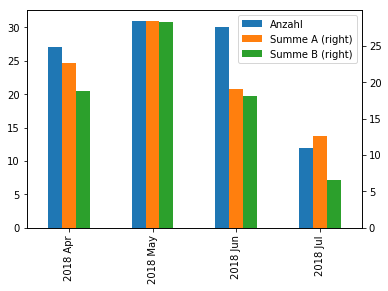

In [6]:
ax1 = to_plot.plot(kind="bar",secondary_y=['Summe A','Summe B'])
ax1.xaxis.set_ticklabels(to_plot.index.strftime('%Y %b'));
